# Task 1

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
import statsmodels.api as sm
# for Standardization
from sklearn.preprocessing import StandardScaler
# for min_max scaling
from sklearn.preprocessing import MinMaxScaler
# split
from sklearn.model_selection import train_test_split
#RMSE
from sklearn.metrics import mean_squared_error

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Differentiate between the independent variables and the dependent variable and assign them to variables x and y.
#### Dependent variable: Outcome (Diabetes or no Diabetes)
#### Independent variables: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

### Generate training and test sets comprising 80% and 20% of the data respectively.

In [4]:
y = diabetes['Outcome']
X = diabetes.iloc[:,0:8]
y = y.values.reshape(-1, 1)
X = X.values.reshape(-1, 8)




### Use a MinMaxScaler and StandardScaler from sklearn.preprocessing. Fit these scalers on the train set and use these fit scalers to transform the train and test sets

## To choose which scaling to use, I will first test for the normaility of the univariate distributions

In [5]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

## Visual Inspection

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


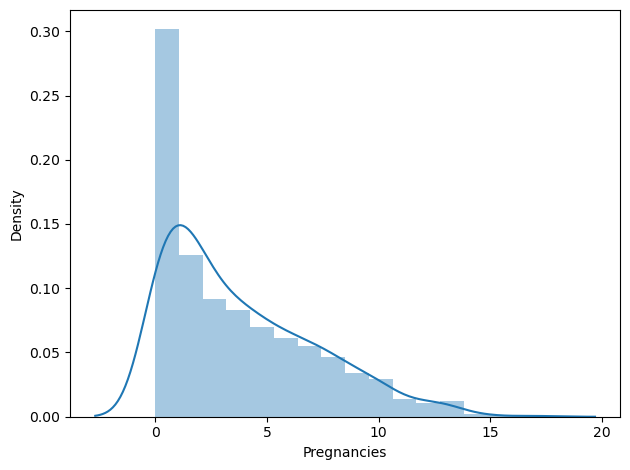

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


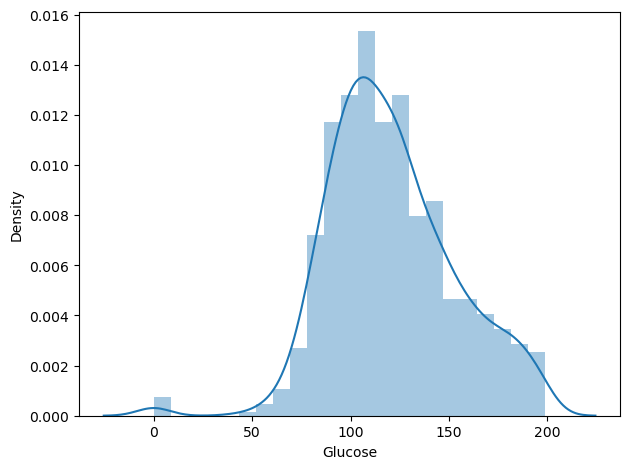

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


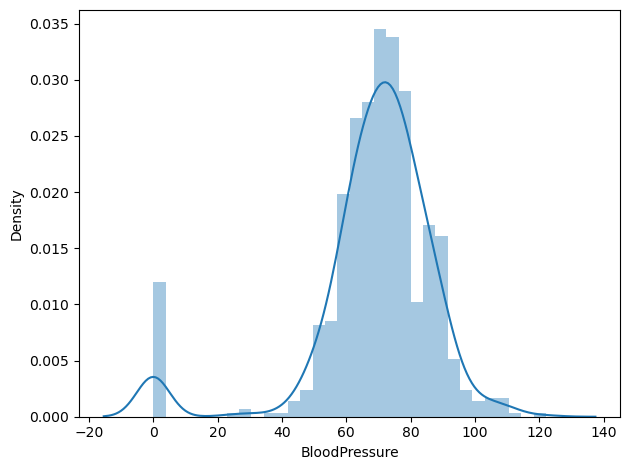

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


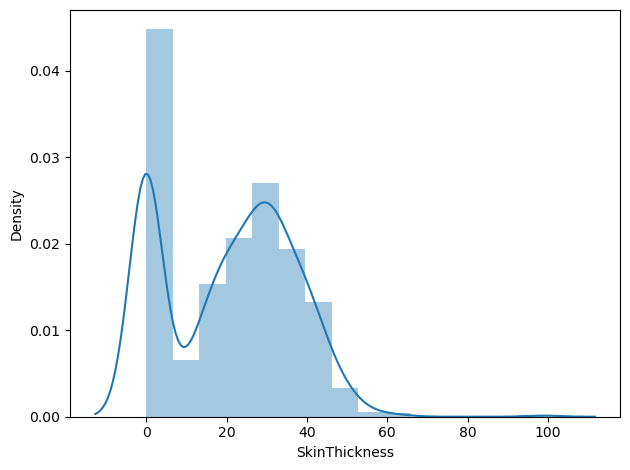

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


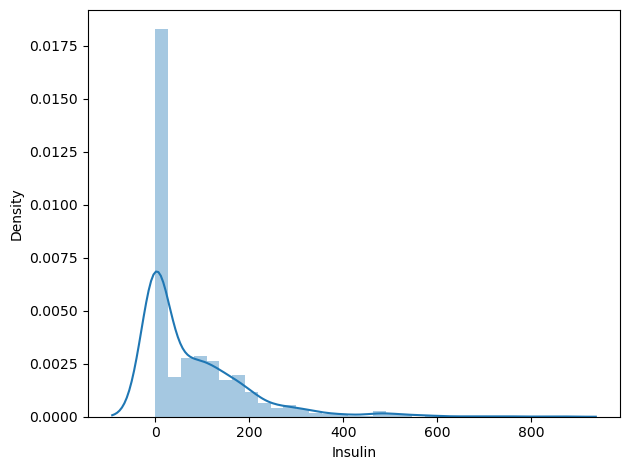

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


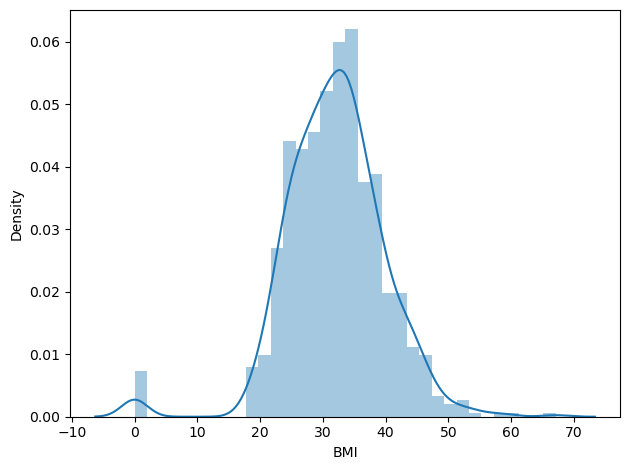

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


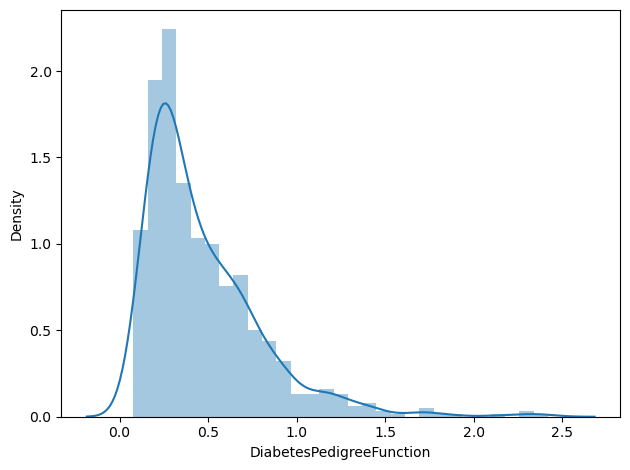

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


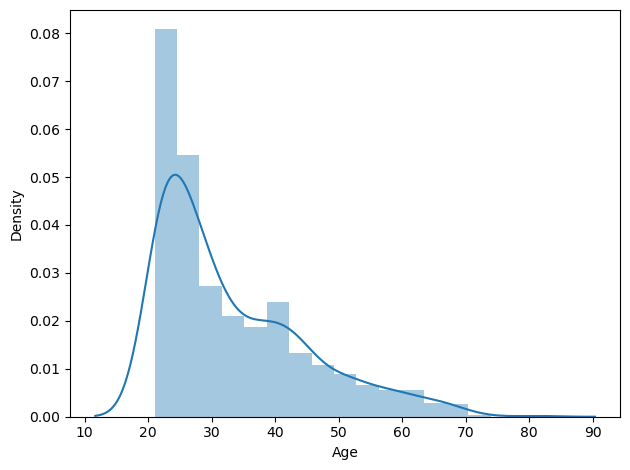

In [6]:
for i in diabetes[col]:
    sns.distplot(diabetes[i])
    plt.tight_layout()
    plt.show()
    plt.close()

## Most of the distributions do not look normally distributed however some like BMI do.

## Hypothesis test

Q-Q Plots


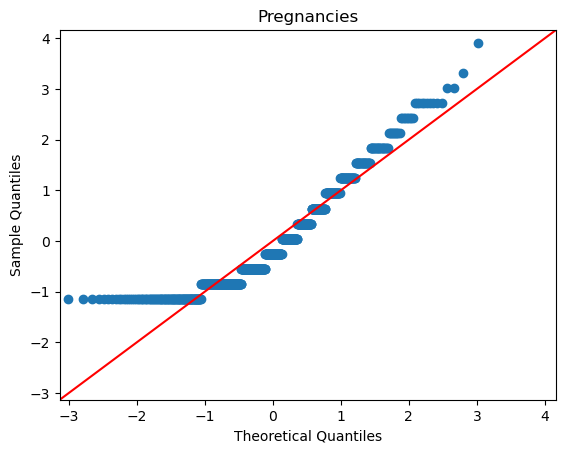

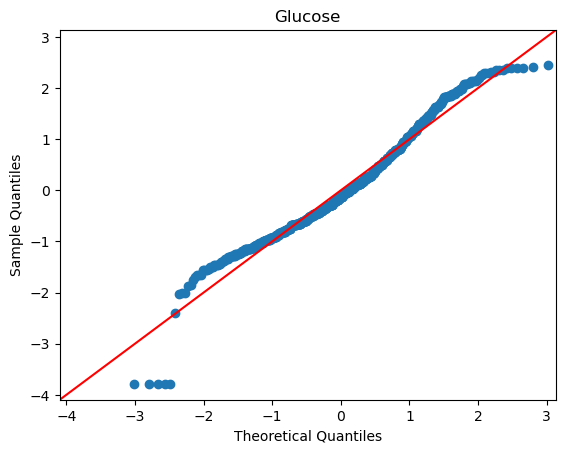

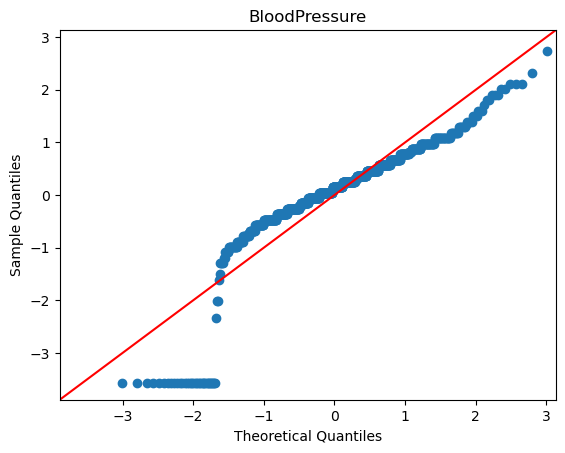

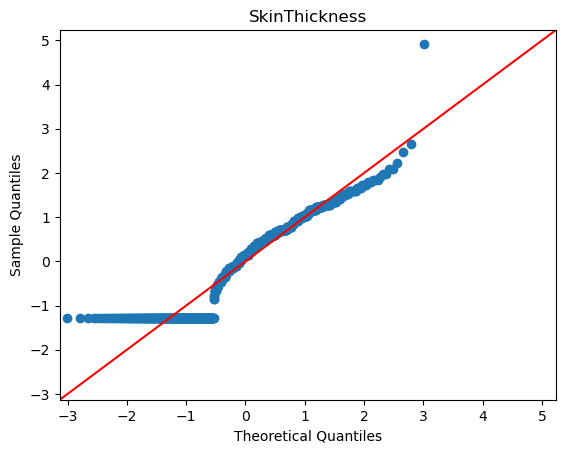

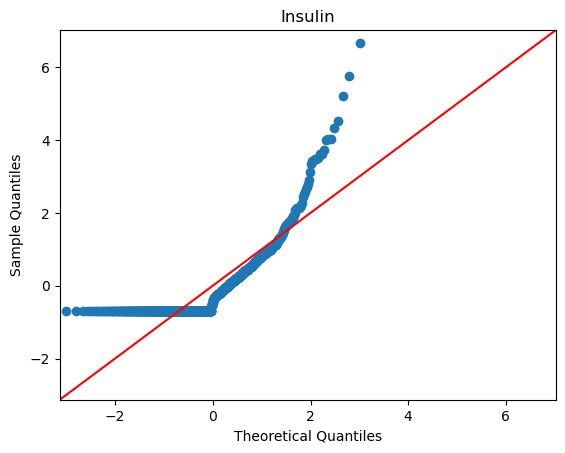

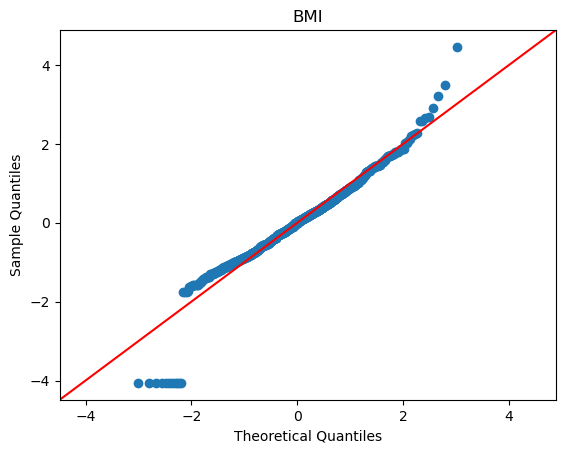

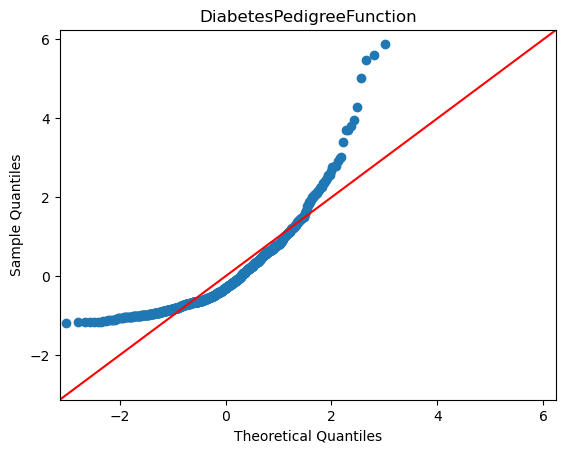

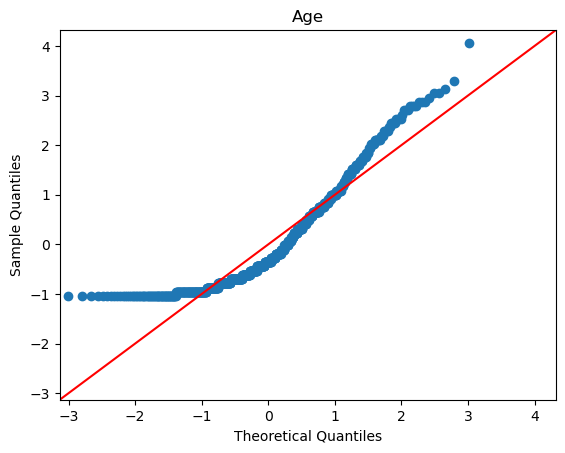

In [7]:

print('Q-Q Plots')
for i in diabetes[col]:
    sm.qqplot(diabetes[i], line ='45',fit = True)
    plt.title(i)

## The Q-Q plot show that none of the distributions are normal as all of them deviate in some sense.

In [8]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test


print('Kolmogorov-Smirnov HYPOTHESIS TEST FOR NORMALITY\n')
for i in diabetes[col]:
    print(f"{i}: {kstest(diabetes[i],'norm')}")
    print('\n')

Kolmogorov-Smirnov HYPOTHESIS TEST FOR NORMALITY

Pregnancies: KstestResult(statistic=0.6968134960685429, pvalue=0.0)


Glucose: KstestResult(statistic=0.9934895833333334, pvalue=0.0)


BloodPressure: KstestResult(statistic=0.9544270833333334, pvalue=0.0)


SkinThickness: KstestResult(statistic=0.7044270833320534, pvalue=0.0)


Insulin: KstestResult(statistic=0.5130208333333333, pvalue=3.8281648254806985e-188)


BMI: KstestResult(statistic=0.9856770833333334, pvalue=0.0)


DiabetesPedigreeFunction: KstestResult(statistic=0.5321697007817534, pvalue=1.3470296961082546e-203)


Age: KstestResult(statistic=1.0, pvalue=0.0)




## The null hypothesis is that the two distributions are identical meaning that these distributions and normal distribution are identical. However none of the p values are greater than 0.05. This means we reject the null hypothesis as there is less than 5% of chance that the distributions are sampled from a normal distribution.

## We will normalize all of the distributions instead to reduce sensitivity of the regression coefficients. Also since we don't want to remove outliers better to use this instead of standard scaler

In [9]:
minmax_scaler = MinMaxScaler()
X2 = minmax_scaler.fit_transform(X)

## After mixmax scaling we will split the data into an 80-20 splot

In [10]:
x_train,x_test,y_train,y_test= train_test_split(X2,y,test_size =0.2,shuffle=True,stratify = y)

In [11]:
# fit a model
lm = LinearRegression()
model = lm.fit(x_train, y_train)



In [12]:
# Intercept and coefficients of the OLS model
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 [-0.81331714]
Coefficients: 
 [[ 0.43255927  1.2168829  -0.28287656  0.0325747  -0.10819574  0.82180251
   0.44743213  0.1068302 ]]


In [13]:
# Test the predictions in the test set
predictions = lm.predict(x_test)

In [14]:
predictions

array([[ 0.29892217],
       [ 0.70300789],
       [-0.19968119],
       [ 0.82711895],
       [ 0.98196664],
       [ 0.08285324],
       [ 0.20325899],
       [ 0.60635031],
       [ 0.17406331],
       [ 0.2285751 ],
       [ 0.16860048],
       [ 0.63340181],
       [ 0.57576178],
       [ 0.09714   ],
       [ 0.13346628],
       [ 0.39963506],
       [ 0.58132426],
       [ 0.41057287],
       [ 0.32318894],
       [-0.13995202],
       [ 0.48479993],
       [ 0.70543417],
       [ 0.60637629],
       [ 0.30095184],
       [ 0.4145578 ],
       [ 0.29005343],
       [-0.5743389 ],
       [ 0.23076594],
       [ 0.37571392],
       [ 0.19919479],
       [ 0.7100204 ],
       [ 0.50620801],
       [ 0.21022997],
       [ 0.43544827],
       [ 0.7166654 ],
       [ 0.10972793],
       [ 0.2216539 ],
       [ 0.91772297],
       [ 0.47089656],
       [ 0.36111689],
       [ 0.62631884],
       [ 0.33079357],
       [-0.05734848],
       [ 0.41441426],
       [ 0.20472159],
       [ 0

# For these predictions, set all predicted values below 0.5 to 0 and all predicted values of 0.5 or above to 1.

In [15]:
def func(x):
    if x >= 0.5:
        return 1
    else:
        return 0
list(map(func,predictions))

[0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [16]:
len(predictions)

154

# Compute the accuracy_score of your model on the test set

In [17]:
print ("Score:", model.score(x_test, y_test))

Score: 0.1924977191074574


## The R squared value shows that the variation explained by the model is quite low. In other words, there is 27.4% variation in the Outcome variable that can be explained by the model.

# Task 2

In [18]:
pd.set_option('display.max_rows',5000)

In [19]:
wages = pd.read_csv('hourlywagedata.csv')

## Data Quality assessment

In [20]:
wages.describe()

,position,agerange,yrsscale
count,3000.000000,3000.000000,3000.000000
mean,0.333333,2.136000,3.527333
std,0.471483,0.661551,1.349022
min,0.000000,1.000000,1.000000
25%,0.000000,2.000000,3.000000
50%,0.000000,2.000000,4.000000
75%,1.000000,3.000000,5.000000
max,1.000000,3.000000,6.000000


In [21]:
wages

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338
5,0,1,1,18.1174858901292
6,1,1,3,13.1400498995424
7,0,1,1,24.7253574648846
8,0,1,2,15.7033859876378
9,1,1,1,18.9398303592689


In [22]:
# Finding null values per column
missing = pd.DataFrame({'Column':[],'Number of blank datapoints':[]})
for i in range(len(wages.columns)):
    missing.loc[i,['Column']] = wages.columns[i]
    missing.loc[i,['Number of blank datapoints']] = wages.iloc[:,i].eq(' ').sum()

# look at the # of missing points in the first ten columns
missing = missing.sort_values(by = ['Number of blank datapoints'],ascending = False)
missing.reset_index(inplace = True, drop = True)
missing

,Column,Number of blank datapoints
0,hourwage,89.0
1,position,0.0
2,agerange,0.0
3,yrsscale,0.0


In [23]:
# drop blank rows
clean_wages = wages.loc[~wages['hourwage'].eq(' ')]
clean_wages.shape[0]

2911

In [24]:
clean_wages['hourwage'] = clean_wages['hourwage'].astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_9908\1280237426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_wages['hourwage'] = clean_wages['hourwage'].astype(float)


In [25]:
clean_wages.describe()

,position,agerange,yrsscale,hourwage
count,2911.000000,2911.000000,2911.000000,2911.000000
mean,0.331845,2.135005,3.527310,20.015860
std,0.470956,0.662169,1.350777,4.003089
min,0.000000,1.000000,1.000000,4.215732
25%,0.000000,2.000000,3.000000,17.415044
50%,0.000000,2.000000,4.000000,20.180008
75%,1.000000,3.000000,5.000000,22.784393
max,1.000000,3.000000,6.000000,32.803854


## Generate three plots showing the average hourly wage against the three categorical independent variables.

<Figure size 4000x4000 with 0 Axes>

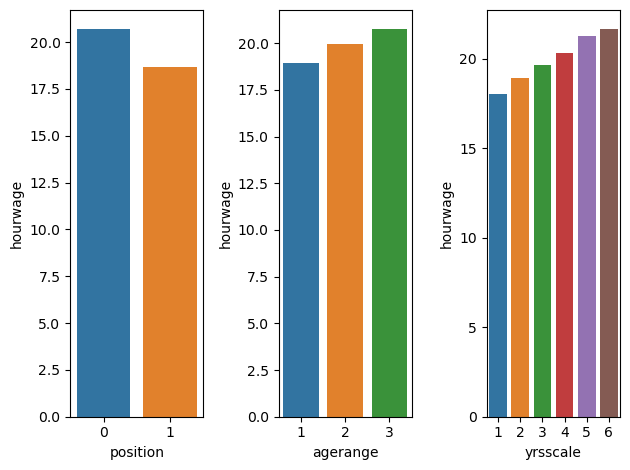

In [26]:
plt.figure(figsize = (40,40))
fig,ax = plt.subplots(1,3)
sns.barplot(x = clean_wages['position'], y = clean_wages['hourwage'], ax = ax[0],ci= None)
sns.barplot(x = clean_wages['agerange'], y = clean_wages['hourwage'], ax = ax[1],ci= None)
sns.barplot(x = clean_wages['yrsscale'], y = clean_wages['hourwage'], ax = ax[2],ci= None)
plt.tight_layout()

## Regression Model

In [27]:
# set the dependent and independent variables
y = clean_wages['hourwage']
X = clean_wages[['position','agerange','yrsscale']]
y = y.values.reshape(-1, 1)
X = X.values.reshape(-1, 3)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2,shuffle=True)

##  Investigate whether the distribution of the variables in your test set is representative of the distribution in the training set.

In [29]:
training_work_location = x_train[:,0]
testing_work_location = x_test[:,0]

In [30]:
print(f"The proportion of office workers in the training dataset is: {sum([i for i in training_work_location if i == 1])/ len(training_work_location)}")

The proportion of office workers in the training dataset is: 0.3320446735395189


In [31]:
print(f"The proportion of office workers in the training dataset is: {sum([i for i in testing_work_location if i == 1])/ len(testing_work_location)}")

The proportion of office workers in the training dataset is: 0.33104631217838765


## Both are roughly equal so distribution is representative

In [32]:
# Fit the model
lm = LinearRegression()
model = lm.fit(x_train, y_train)
# Intercept and coefficients of the OLS model
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)


Intercept: 
 [18.41047715]
Coefficients: 
 [[-1.96681094 -0.29350618  0.82683878]]


In [33]:
x_test.shape

(583, 3)

In [37]:
predictions = lm.predict(x_test)

In [38]:
predictions.shape

(583, 1)

In [39]:
errors =y_test-predictions

In [40]:
y_train = y_train.reshape(-1, 1)
x_train = x_train.reshape(-1, 3)

In [41]:
y_train.shape

(2328, 1)

In [42]:
x_train.shape

(2328, 3)

In [43]:
error_bar_values = np.abs((y_test-predictions)[:,0])

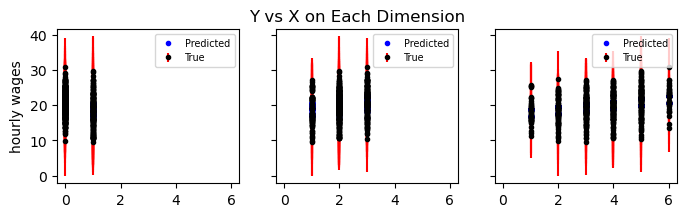

In [44]:
## Plot the errors
# plt.figure(figsize = (10,10))
# plt.errorbar(x = x_test[:,0],y =  y_test[:,0], yerr= errors[:,0], fmt='.k', ecolor="red")
# plt.tight_layout()
fig, ax = plt.subplots(1, x_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel('hourly wages')

for i in range(x_test.shape[1]):
    ax[i].errorbar(x_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(x_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

## ROOT MEAN SQUARE ERROR

### The root mean square error measures the average distance between predictions and actual values. The closer the value to zero the better the prediction made by the model

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

12.840400942820164

## The root mean square error indicates that the model does not do a great job of predicting the impact on hours worked

In [46]:
model.score(x_test, y_test)

0.1466332140977712

## Printing out regression results using stats.model api

In [48]:
X = sm.add_constant(x_train) 
res = sm.OLS(y_train, X).fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     98.76
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           3.63e-60
Time:                        17:51:34   Log-Likelihood:                -6409.7
No. Observations:                2328   AIC:                         1.283e+04
Df Residuals:                    2324   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4105      0.276     66.591      0.0

## Interpretation of the coefficients

The regression summary shows that that (x1) employee workers who work in an office setting earn $2.05/ hour than those who work in the hospital on average, keeping all else constant.

Furthermore, since the agerange(x2) and yearscale (x3) variables are ordinal, they are ordered by ranking, thus we do not need to create dummy variables for each of the categories within these variables to interpret them like the position variable.

The results show that when the age increases from a lower bucket to a higher age bucket, the wages decrease by -$0.29/ hour. However these results are not statistically significant at the 5% level as indicated by the p-va;ue of 0.064.

Lastly as the yearscale increases from a lower category to a higher category, wages tend to increase by $0.82/hour. These results seem to be statistically significant as the p-value is 0.

In [168]:
clean_wages

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234
1,0,1,2,16.440731
2,0,1,3,21.389108
3,1,1,1,11.377187
4,0,1,3,21.560778
5,0,1,1,18.117486
6,1,1,3,13.140050
7,0,1,1,24.725357
8,0,1,2,15.703386
9,1,1,1,18.939830
